In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("winequality-red.csv")

In [3]:
y = pd.get_dummies(data['quality'])
x = data.drop('quality', axis=1)

In [5]:
y

,3,4,5,6,7,8
0,0,0,1,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,1,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
1594,0,0,1,0,0,0
1595,0,0,0,1,0,0
1596,0,0,0,1,0,0
1597,0,0,1,0,0,0


In [6]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [7]:
x_norm=(x-x.mean())/x.std()
x_norm

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946
1,-0.298454,1.966827,-1.391037,0.043403,0.223805,0.872365,0.624168,0.028252,-0.719708,0.128910,-0.584594
2,-0.298454,1.296660,-1.185699,-0.169374,0.096323,-0.083643,0.228975,0.134222,-0.331073,-0.048074,-0.584594
3,1.654339,-1.384011,1.483689,-0.453077,-0.264878,0.107558,0.411372,0.664069,-0.978798,-0.461036,-0.584594
4,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217415,0.403103,-0.980362,-0.382151,0.053829,1.541571,-0.075020,-0.978459,0.899605,-0.461036,0.072271
1595,-1.389721,0.123866,-0.877693,-0.240300,-0.541090,2.210777,0.137777,-0.861893,1.353012,0.600867,0.729136
1596,-1.159980,-0.099523,-0.723690,-0.169374,-0.243630,1.254769,-0.196617,-0.533387,0.705287,0.541872,0.541460
1597,-1.389721,0.654416,-0.775024,-0.382151,-0.264878,1.541571,-0.075020,-0.676446,1.676875,0.305894,-0.209243


In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_norm, y, test_size=0.25, random_state=605)


In [9]:
def softmax(z):
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

In [10]:
def cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-5
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon) # to avoid division by zero error
    loss = -np.mean(np.sum(y_true * np.log(y_pred), axis=1))
    return loss

In [11]:
def gradient_descent(X, y, learning_rate=0.1,epochs=1000):
    n_samples, n_features = X.shape
    n_classes = y.shape[1]
    weights = np.zeros((n_features, n_classes))
    losses = []

    for i in range(epochs):
        z = np.dot(X, weights)
        y_pred = softmax(z)
        loss = cross_entropy_loss(y, y_pred)
        losses.append(loss)

        error = y_pred - y
        grad = np.dot(X.T, error) / n_samples
        weights -= learning_rate * grad
        
        if (i%(epochs/10)==0):
            print("Cost is:",loss)
            
    return weights,losses


In [12]:
x_train.shape

(1199, 11)

In [13]:
y_train.shape

(1199, 6)

In [14]:
x_train_with_bias = np.concatenate((np.ones((x_train.shape[0], 1)), x_train), axis=1)
x_test_with_bias = np.concatenate((np.ones((x_test.shape[0], 1)), x_test), axis=1)


In [15]:
x_train_with_bias.shape


(1199, 12)

In [16]:
x_test_with_bias.shape

(400, 12)

In [17]:
weights,loss = gradient_descent(x_train_with_bias, y_train)


Cost is: 1.791759469228055
Cost is: 1.0480137039040363
Cost is: 0.9939768498816614
Cost is: 0.9766484408539495
Cost is: 0.9679583339538155
Cost is: 0.9626129337347333
Cost is: 0.958940116807051
Cost is: 0.9562340914149726
Cost is: 0.9541399829619975
Cost is: 0.9524585687803575


In [18]:
weights

array([[-1.71188166e+00, -7.42236181e-01,  1.99464698e+00,
         2.11031954e+00, -7.12380230e-02, -1.57961067e+00],
       [ 7.64595879e-02, -8.36992372e-02, -3.66863709e-01,
        -6.17959467e-02,  4.35525623e-01,  3.73681274e-04],
       [ 3.74184561e-01,  6.70557166e-01,  4.34977311e-02,
        -3.69057802e-01, -5.59949678e-01, -1.59231978e-01],
       [ 3.97962524e-03,  8.03602335e-02, -2.06702019e-02,
        -2.25059196e-01, -7.01004816e-02,  2.31490020e-01],
       [-1.74354899e-01,  2.88088389e-02, -1.78681125e-01,
        -6.87592690e-02,  3.35845756e-01,  5.71406977e-02],
       [ 3.00183543e-01,  1.99793223e-01,  1.73635708e-01,
         1.64185867e-02, -4.41977950e-01, -2.48053111e-01],
       [ 7.25205390e-02, -2.37913662e-01, -6.80935677e-02,
         1.50474086e-01,  9.23618682e-02, -9.34926406e-03],
       [-3.33329491e-02, -2.03771344e-02,  5.35402279e-01,
        -1.63735103e-02, -4.03259126e-01, -6.20595593e-02],
       [ 1.74890934e-01, -4.88830256e-02,  2.848

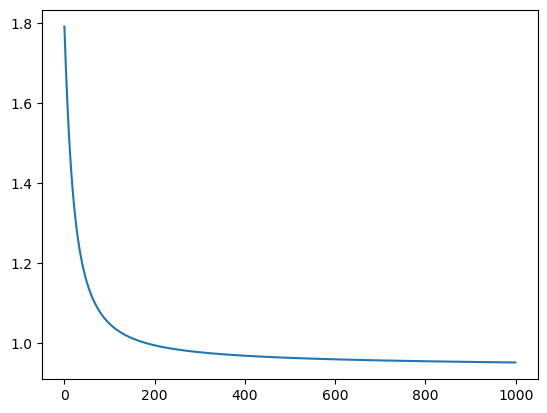

In [19]:
plt.plot(loss)

In [20]:
z_test = np.dot(x_test_with_bias, weights)
y_pred_test = softmax(z_test)
y_pred_test_argmax = np.argmax(y_pred_test, axis=1)


In [21]:
accuracy = np.mean(y_pred_test_argmax == np.argmax(y_test.values, axis=1))
print("Accuracy:", accuracy*100,"%")

Accuracy: 65.75 %
